In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\SONALI PATIL\Downloads\data\Raw\Resume.csv")
# Basic info
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())

print("\nCategory distribution:")
print(df["Category"].value_counts())


Dataset shape: (2484, 4)

Columns:
Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

First 5 rows:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Category distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINAN

In [2]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [3]:
import pandas as pd
import re

# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)     # keep only letters
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Apply cleaning
df["clean_resume_text"] = df["Resume_str"].apply(clean_text)

# Keep only required columns
df_cleaned = df[["clean_resume_text", "Category"]]

# Save cleaned dataset
df_cleaned.to_csv(r"C:\Users\SONALI PATIL\Downloads\data\Raw\Resume.csv", index=False)

print("STEP 2 DONE: Resume text cleaned and saved")
df_cleaned.head()


STEP 2 DONE: Resume text cleaned and saved


,clean_resume_text,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist us hr operations summary versati...,HR
2,hr director summary over years experience in r...,HR
3,hr specialist summary dedicated driven and dyn...,HR
4,hr manager skill highlights hr skills hr depar...,HR


In [4]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 ID                   0
Resume_str           0
Resume_html          0
Category             0
clean_resume_text    0
dtype: int64



Category distribution:
 Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


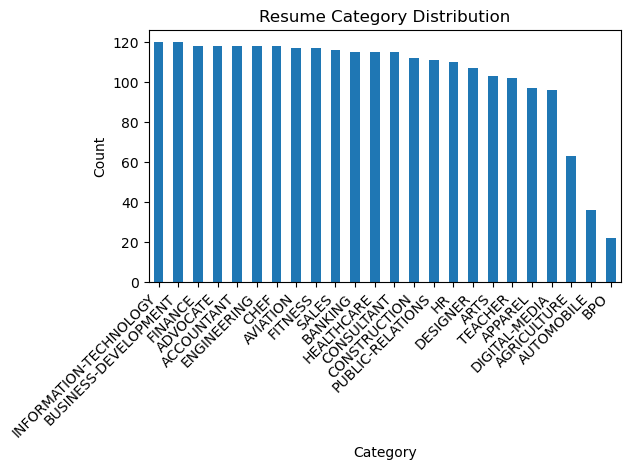

In [5]:
import matplotlib.pyplot as plt
# 2️ Category distribution
# ------------------------------------------------
category_counts = df["Category"].value_counts()
print("\nCategory distribution:\n", category_counts)

plt.figure()
category_counts.plot(kind="bar")
plt.title("Resume Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Resume length summary:
 count    2484.000000
mean      788.270934
std       367.059442
min         0.000000
25%       631.000000
50%       735.000000
75%       905.250000
max      5126.000000
Name: resume_length, dtype: float64


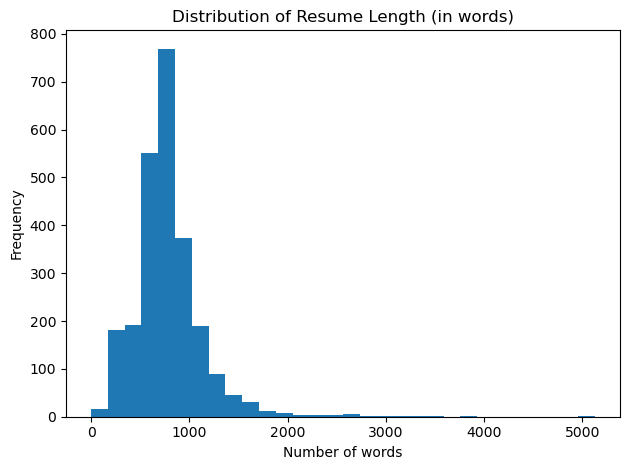

In [6]:
#  Resume length analysis
# ------------------------------------------------
df["resume_length"] = df["clean_resume_text"].apply(lambda x: len(x.split()))

print("\nResume length summary:\n", df["resume_length"].describe())

plt.figure()
plt.hist(df["resume_length"], bins=30)
plt.title("Distribution of Resume Length (in words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## TF-IDF Vectorization & Train/Test Split

In [7]:
# separate feature and text
X = df["clean_resume_text"]
y = df["Category"]

In [8]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [9]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [10]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [11]:
# Train & Evaluate Linear SVM
# import modules
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
# Train the linear SVM model
svm_model = LinearSVC(C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)


LinearSVC(random_state=42)

In [13]:
# make predictions
y_pred = svm_model.predict(X_test_tfidf)


In [14]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7263581488933601


In [15]:
# classification report
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_
))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.88      0.79        24
              ADVOCATE       0.53      0.71      0.61        24
           AGRICULTURE       1.00      0.54      0.70        13
               APPAREL       0.70      0.37      0.48        19
                  ARTS       0.57      0.38      0.46        21
            AUTOMOBILE       1.00      0.43      0.60         7
              AVIATION       0.86      0.75      0.80        24
               BANKING       0.73      0.70      0.71        23
                   BPO       0.50      0.25      0.33         4
  BUSINESS-DEVELOPMENT       0.69      0.92      0.79        24
                  CHEF       0.86      0.75      0.80        24
          CONSTRUCTION       0.73      0.86      0.79        22
            CONSULTANT       0.75      0.39      0.51        23
              DESIGNER       0.86      0.86      0.86        21
         DIGITAL-MEDIA       0.69      

In [16]:
# since the accuracy is high, let's do some sanity checks
import pandas as pd

print("Train distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Train distribution:
20    0.048314
9     0.048314
10    0.047307
15    0.047307
16    0.047307
0     0.047307
17    0.047307
1     0.047307
22    0.046804
6     0.046804
18    0.046301
12    0.046301
7     0.046301
11    0.045294
21    0.044791
19    0.044288
13    0.043281
4     0.041268
23    0.041268
3     0.039255
14    0.038752
2     0.025164
5     0.014595
8     0.009059
Name: proportion, dtype: float64

Test distribution:
10    0.048290
6     0.048290
1     0.048290
15    0.048290
16    0.048290
20    0.048290
0     0.048290
9     0.048290
18    0.046278
12    0.046278
7     0.046278
22    0.046278
17    0.046278
21    0.044266
11    0.044266
19    0.044266
13    0.042254
4     0.042254
23    0.040241
14    0.038229
3     0.038229
2     0.026157
5     0.014085
8     0.008048
Name: proportion, dtype: float64


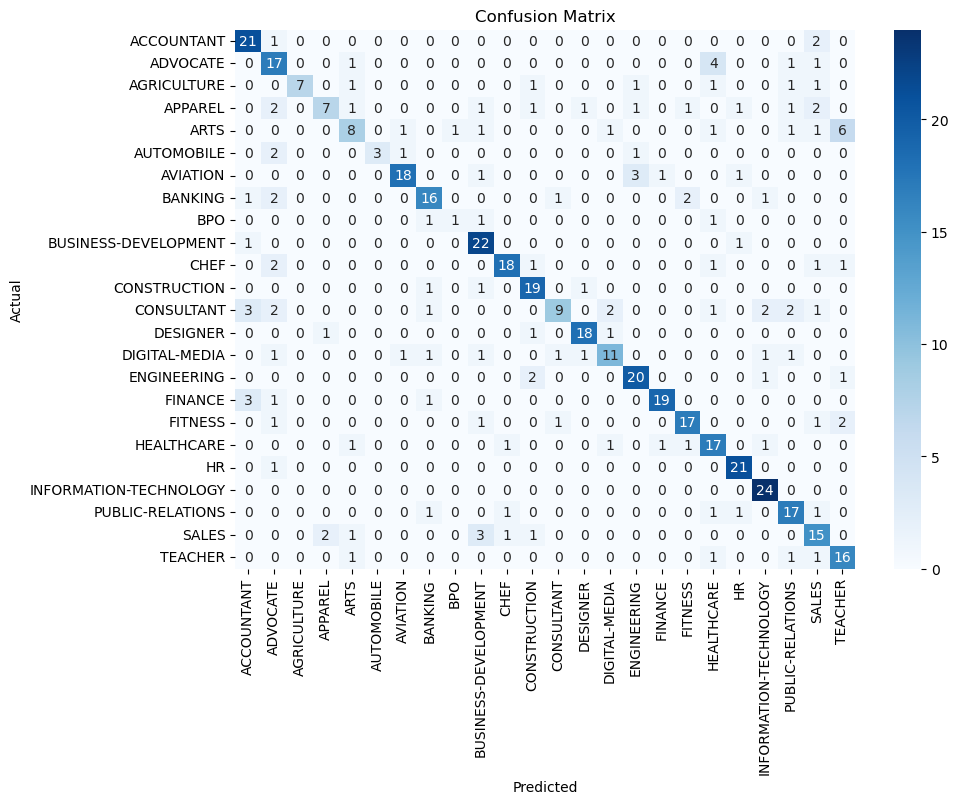

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
# let's do some manual sanity test
sample_text = df["clean_resume_text"].iloc[1]
sample_vec = tfidf.transform([sample_text])
pred_label = svm_model.predict(sample_vec)

print("Predicted:", label_encoder.inverse_transform(pred_label)[0])
print("Actual:", df["Category"].iloc[0])


Predicted: HR
Actual: HR


In [19]:
#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [20]:
# Train the model
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [21]:
# Predict
y_pred_lr = log_reg.predict(X_test_tfidf)


In [22]:
# Evaluate
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print(classification_report(
    y_test,
    y_pred_lr,
    target_names=label_encoder.classes_
))



Logistic Regression Accuracy: 0.6498993963782697
                        precision    recall  f1-score   support

            ACCOUNTANT       0.65      0.83      0.73        24
              ADVOCATE       0.29      0.42      0.34        24
           AGRICULTURE       1.00      0.38      0.56        13
               APPAREL       0.60      0.16      0.25        19
                  ARTS       0.50      0.29      0.36        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.85      0.71      0.77        24
               BANKING       0.71      0.65      0.68        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.54      0.92      0.68        24
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.78      0.82      0.80        22
            CONSULTANT       0.50      0.22      0.30        23
              DESIGNER       0.82      0.86      0.84 

C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [24]:
nb_model = MultinomialNB(alpha=0.1)  # smoothing
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB(alpha=0.1)

In [25]:
y_pred_nb = nb_model.predict(X_test_tfidf)


In [26]:
print("Naive Bayes Accuracy:",
      accuracy_score(y_test, y_pred_nb))

print(classification_report(
    y_test,
    y_pred_nb,
    target_names=label_encoder.classes_
))


Naive Bayes Accuracy: 0.5754527162977867
                        precision    recall  f1-score   support

            ACCOUNTANT       0.50      0.83      0.62        24
              ADVOCATE       0.31      0.42      0.36        24
           AGRICULTURE       0.67      0.15      0.25        13
               APPAREL       0.50      0.11      0.17        19
                  ARTS       0.43      0.14      0.21        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.83      0.62      0.71        24
               BANKING       0.78      0.61      0.68        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.43      0.88      0.58        24
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.65      0.77      0.71        22
            CONSULTANT       0.40      0.09      0.14        23
              DESIGNER       0.76      0.62      0.68        2

C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SONALI PATIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# final comparision of the models
import pandas as pd

comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Linear SVM",
        "Naive Bayes"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_nb)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.649899
1,Linear SVM,0.726358
2,Naive Bayes,0.575453


I experimented with multiple text classification models. Linear SVM performed best. Further gains were limited due to data overlap, indicating the performance ceiling was data-driven rather than model-driven

In [28]:
# let's try to tune svm 
for c in [0.1, 0.5, 1, 2,3]:
    svm = LinearSVC(C=c, random_state=42)
    svm.fit(X_train_tfidf, y_train)
    preds = svm.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"C={c} → Accuracy={acc:.4f}")


C=0.1 → Accuracy=0.6559
C=0.5 → Accuracy=0.7042
C=1 → Accuracy=0.7264
C=2 → Accuracy=0.7223
C=3 → Accuracy=0.7264


In [29]:
#Class weighting ( IMPORTANT if data is  noisy data)
svm_model_1 = LinearSVC( C=1.0, class_weight="balanced", random_state=42 ) 
svm_model_1.fit(X_train_tfidf, y_train)
# Predict on test data
y_pred = svm_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7263581488933601


In [30]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(
    loss="hinge",
    alpha=1e-4,
    max_iter=1000,
    random_state=42
)

sgd_model.fit(X_train_tfidf, y_train)
y_pred_sgd = sgd_model.predict(X_test_tfidf)

accuracy_score(y_test, y_pred_sgd)


0.7183098591549296

Multiple machine learning models were evaluated, including Logistic Regression, Linear SVM, and Naive Bayes. Linear SVM consistently outperformed other models. Further tuning and alternative classifiers did not improve performance, indicating that the model performance was constrained by dataset noise and category overlap rather than algorithm choice.

In [35]:
# save everything using joblib
import joblib
import os

model_dir = r"C:\Users\SONALI PATIL\Resume_Classification\models"
os.makedirs(model_dir, exist_ok=True)

joblib.dump(tfidf, os.path.join(model_dir, "tfidf_vectorizer.pkl"))
joblib.dump(svm_model, os.path.join(model_dir, "linear_svm_model.pkl"))
joblib.dump(label_encoder, os.path.join(model_dir, "label_encoder.pkl"))



['C:\\Users\\SONALI PATIL\\Resume_Classification\\models\\label_encoder.pkl']